# Part 3 Lecture 177 Data Preprocessing

##### Logistic Regression for Data Classification

In [24]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn import metrics

import statsmodels.api  as sm

import warnings
warnings.filterwarnings('ignore')

### Example 1:  Predict Student/Pass Fail using study hours per week

#### The average weekly hours in a particular Computer Science Course for a group of college students are recorded as variable \'Hours'.
#### Each student\'s PASS/FAIL is recorded as variable Y.

### Question:
#### Can you predict if a student will PASS/FAIL the course based on the student\'s study hours per week?

###### Step 1:  Create a random \'toy\' sample

###### 20 fails
###### 20 passes
###### Fails have a mean of 20 hours of study per week (std = 5 hours)
###### Passes have a mean of 30 hours of study per week (std = 5 hours)

In [25]:
# Create the dataset:

x1 = np.random.normal(20, 5, 20)
x2 = np.random.normal(30, 5, 20)

fail_df = pd.DataFrame(
    {
        'Hours':x1,
        'Result': 0,
        'Grade': 'FAIL'
        }
    )

pass_df = pd.DataFrame(
    {
        'Hours':x2,
        'Result': 1,
        'Grade': 'Pass'
        }
    )

# Combine the frames and shuffle the rows randomly

data_1 = pd.concat([pass_df, fail_df]).sample(frac=1)

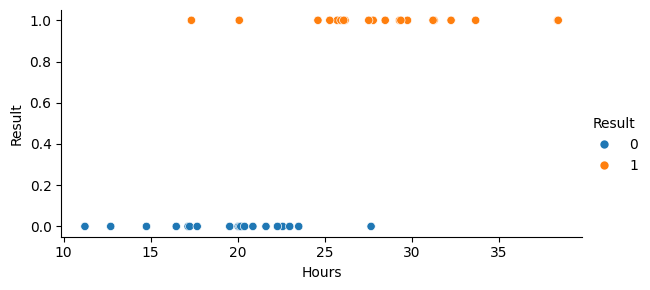

In [26]:
# Plot the data:

rel_1 = sns.relplot(data=data_1, x='Hours', y='Result', hue = 'Result', height = 3, aspect = 2)
rel_1.fig.savefig(r'output/relplot_students.png')

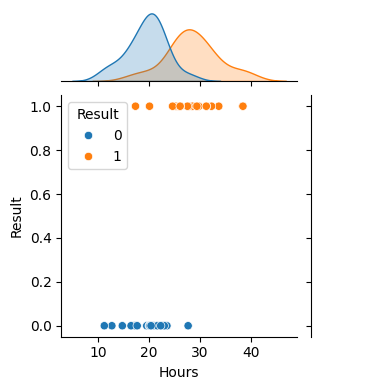

In [27]:
# Plot with jointplot

jntplot_1 = sns.jointplot(data=data_1, x='Hours', y='Result', hue='Result', height=4, ratio=3)
jntplot_1.fig.savefig(r'output/student_jntplt_1.png')

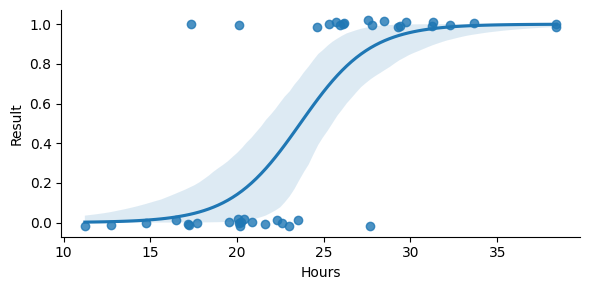

In [28]:
# Plot the logistic regression:
# Jitter set to 0.02 to move dots around a little to show them all see below for jitter = 0
l_reg = sns.lmplot(data=data_1, x='Hours', y='Result', height=3, aspect=2, logistic=True, y_jitter=0.02)
l_reg.fig.savefig(r'output/lmplot_Student_1.png')

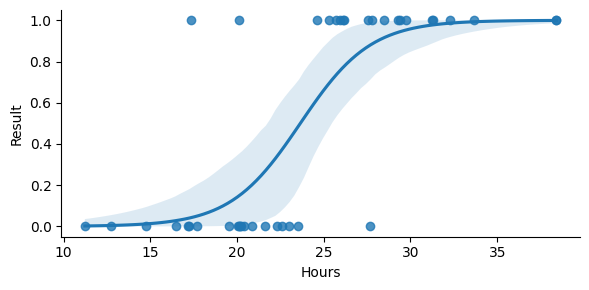

In [29]:
l_reg_1 = sns.lmplot(data=data_1, x='Hours', y='Result', height=3, aspect=2, logistic=True, y_jitter=0)
l_reg_1.fig.savefig(r'output/lmplot_Student_2.png')

#### Lecture 178 - Logisitic Regression Models:

In [34]:
model_1 = LogisticRegression()
X = data_1[['Hours']]
y = data_1['Result']
model_1.fit(X=X, y=y)

# NB Optimisation in Sklearn can be turned off by setting penalty = None in the call to LogisticRegression(penalty = None)

LogisticRegression()

In [31]:
model_1.coef_

array([[0.48339559]])

In [32]:
model_1.intercept_

array([-11.43214821])

In [33]:
# Another way of doing it, using Statmodels:
# Statsmodels has no intercept so one needs to force it to have an intercept
# Need to add a vector of 1s to the X variable

X_sm = sm.add_constant(X)
# X_sm
model_sm = sm.Logit(y, X_sm).fit()
print(model_sm.summary())

Optimization terminated successfully.
         Current function value: 0.336844
         Iterations 7
                           Logit Regression Results                           
Dep. Variable:                 Result   No. Observations:                   40
Model:                          Logit   Df Residuals:                       38
Method:                           MLE   Df Model:                            1
Date:                Sun, 07 Jan 2024   Pseudo R-squ.:                  0.5140
Time:                        18:49:22   Log-Likelihood:                -13.474
converged:                       True   LL-Null:                       -27.726
Covariance Type:            nonrobust   LLR p-value:                 9.349e-08
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const        -11.6791      3.535     -3.304      0.001     -18.608      -4.750
Hours          0.4939      0.

##### Step 4 Evaluate Model Performance - Lecture 179

##### Score
##### Confusion Matrix

In [35]:
model_1.score(X=X, y=y)

0.925

In [36]:
# Confusion Matrix

data_1['Predicted_Result'] = model_1.predict(X=X)


In [37]:
data_1

,Hours,Result,Grade,Predicted_Result
9,33.669372,1,Pass,1
0,19.539625,0,FAIL,0
1,29.294939,1,Pass,1
7,20.870474,0,FAIL,0
3,25.719379,1,Pass,1
4,20.028108,0,FAIL,0
8,20.200036,0,FAIL,0
1,12.701302,0,FAIL,0
17,28.474197,1,Pass,1
10,29.753387,1,Pass,1


Confusion Matrix is comparing the results of the regression to the actual data

In [39]:
metrics.confusion_matrix(data_1['Result'], data_1['Predicted_Result'])

array([[19,  1],
       [ 2, 18]], dtype=int64)

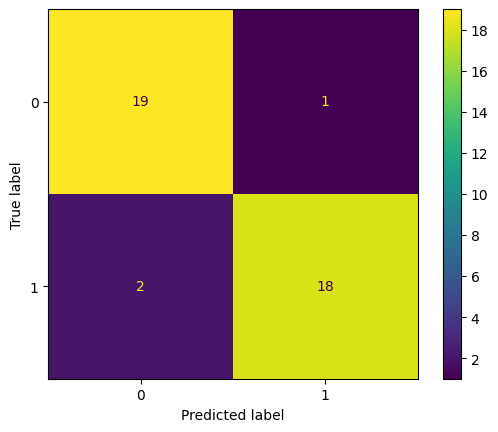

In [43]:
metrics.ConfusionMatrixDisplay.from_estimator(model_1, X, y).figure_.savefig(r'output/Confusion_Plot.png')
# Results below show 0 - 19 fails predicted 18 so 1 out 2 - 18 passes, incorrectly predicted 2

#### Lecture 180 Using Categorical Variables:

##### It is possible to use the grade Fail or Pass to do the same thing:

In [49]:
y_2=data_1['Grade']
model_2 = LogisticRegression().fit(X=X, y=y_2)

In [51]:
model_2.intercept_

array([-11.43214821])

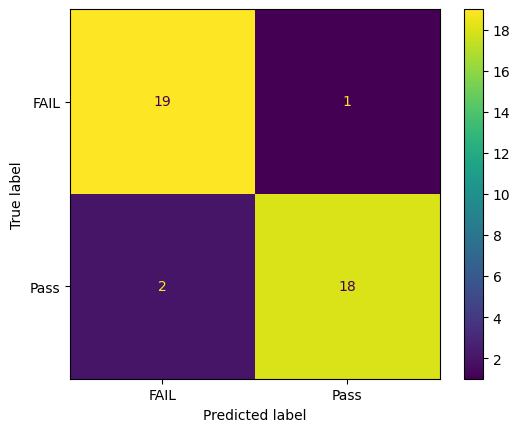

In [58]:
metrics.ConfusionMatrixDisplay.from_estimator(model_2, X, y_2).figure_.savefig(r'output/ConfusionPlotCat.png')

In [59]:
model_2.score(X=X, y=y_2)

0.925

In [61]:
# Double Check:
(19+18)/40

0.925

# Lecture 181 The Iris Flower Data Set Example:

##### Example 2:  Iris Flowers Classification:

###### Famoua R Fischer\'s Iris Dataset 
###### 3 Species of Iris Flowers 50 samples each, 150 rows in total
###### 4 Explanitary variables all continuous
###### 1 Label variable - Species

##### Question:
###### Can the computer classify any arbitrary iris flower inot one of the three species, given 4 measurements?

In [62]:
iris = sns.load_dataset('iris')

In [64]:
iris

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,virginica
146,6.3,2.5,5.0,1.9,virginica
147,6.5,3.0,5.2,2.0,virginica
148,6.2,3.4,5.4,2.3,virginica


#### Exploritory Analysis

In [65]:
iris.species.unique()

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [66]:
iris.species.value_counts()

species
setosa        50
versicolor    50
virginica     50
Name: count, dtype: int64

##### Step 2:  Divide the model into training (70%) and testing (30%) datasets:

In [67]:
X = iris.iloc[:, 0:4]
y = iris.species

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, train_size=0.7)

In [79]:
X_train.shape

(105, 4)

In [80]:
X_test.shape

(45, 4)

In [81]:
y_train.shape

(105,)

In [82]:
y_test.shape

(45,)

#### Step 3: Fit Logistic Regression Model to Training Data:

In [83]:
iris_model = LogisticRegression().fit(X=X_train, y=y_train)

In [87]:
iris_model.coef_

array([[-0.37738714,  0.91545755, -2.29304581, -1.01344844],
       [ 0.38417916, -0.3068597 , -0.15796876, -0.78211144],
       [-0.00679202, -0.60859785,  2.45101457,  1.79555987]])

#### Step 4: Evaluate Model Performance with testing data (output sample)

In [86]:
iris_model.score(X=X_train, y=y_train)

0.9619047619047619

In [95]:
predicted_species = iris_model.predict(X=X_train)
# Set up results df to eyeball the data for quick accuracy check.

results = pd.DataFrame(
    {
        'Prediction': predicted_species,
        'Actual': y_train
    }
)
results

,Prediction,Actual
48,setosa,setosa
50,versicolor,versicolor
39,setosa,setosa
83,virginica,versicolor
95,versicolor,versicolor
...,...,...
19,setosa,setosa
89,versicolor,versicolor
96,versicolor,versicolor
123,virginica,virginica


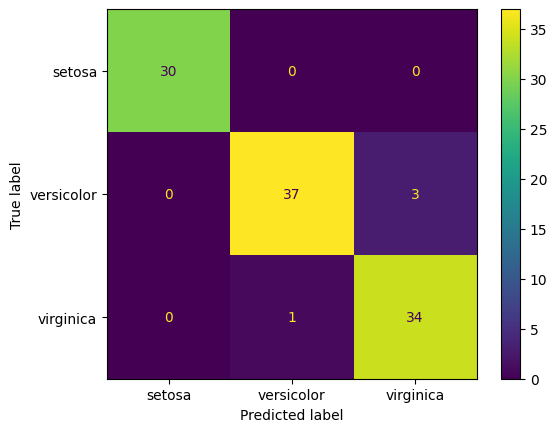

In [101]:
# Produce a confusion matrix from the data:

metrics.ConfusionMatrixDisplay.from_estimator(iris_model, X_train, y_train).figure_.savefig(r'output/ConfusionMatrix_Iris_Train.png')

#### Step 5:  Evaluate Model Performance with Testing Data (Out Sample)

###### Score
###### Confusion Matrix

In [100]:
# Output (Testing Dataset) Score/Accuracy:

iris_model.score(X=X_test, y=y_test)

1.0

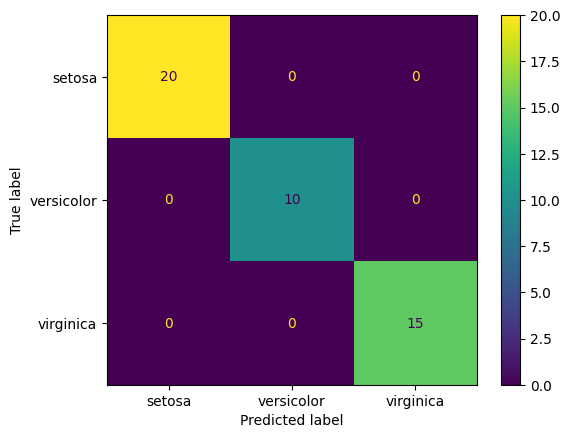

In [103]:
# Confusion Matrix:

metrics.ConfusionMatrixDisplay.from_estimator(iris_model, X_test, y_test).figure_.savefig(r'output/ConfusionMatrix_Iris_Test.png')

# My score came out a lot better than the tutor's.  He got 91.9% accuracy - my Training Score came out better than his too.